<a href="https://colab.research.google.com/github/Vu3jxg/Internship_Corizo/blob/main/Wine_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Wine_Quality_Analysis/Red_wine_data.xlsx'
sheet_name = 'winequality_red'

In [ ]:
wine_df = pd.read_excel(path, sheet_name)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [ ]:
# Checking whether any NUll values present in the dataset.
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [ ]:
# Checking the missing values in each column of the dataframe.
df = wine_df.isnull().sum()
df

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [ ]:
wine_df.quality.value_counts()

5.0    680
6.0    638
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

In [ ]:
# replacing the "quality" column missing value with the most frequent value of the column.

wine_df['quality'] = wine_df['quality'].fillna(wine_df['quality'].mode()[0]) 

In [ ]:
# As the column 'ph', 'total sulfur dioxide' has null values present in the column replacing it with mean and median value of the columns

wine_df['pH'] = wine_df['pH'].fillna(wine_df['pH'].mean())

wine_df['total sulfur dioxide'] = wine_df['total sulfur dioxide'].fillna(wine_df['total sulfur dioxide'].median())

wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [ ]:
# Checking the datatypes of each column 
wine_df.dtypes 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [ ]:
#  converting the wine_df['quality'] to int datatype.

wine_df['quality'] = wine_df['quality'].astype(int)
wine_df.dtypes 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
# Checking the shape of the dataset
wine_df.shape

(1599, 12)

In [ ]:
# # Checking if there are any duplicate rows.
# duplicate = wine_df[wine_df.duplicated()]
# duplicate

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
76,8.8,0.410,0.64,2.20,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.52,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.52,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.52,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.52,0.60,11.3,5


In [ ]:
# Droping the duplicated rows to improve the accuracy score.

# wine_df= wine_df.drop_duplicates()

In [ ]:
# Printing the descriptive statistics of each & every column using describe() function

wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.427767,32.866637,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.498586,0.080321,2.74000,3.5200,3.52000,3.520000,3.90000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### **Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


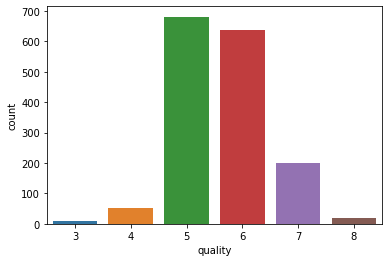

In [ ]:
# number of values for each quality
sns.countplot(wine_df['quality'])

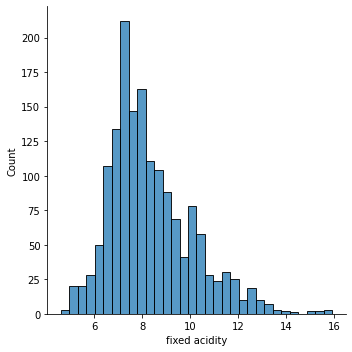

In [ ]:
sns.displot(wine_df['fixed acidity'])

### Bivariate analysis

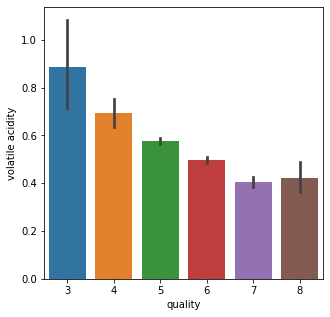

In [ ]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_df)

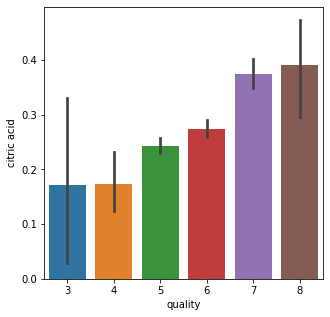

In [ ]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_df)

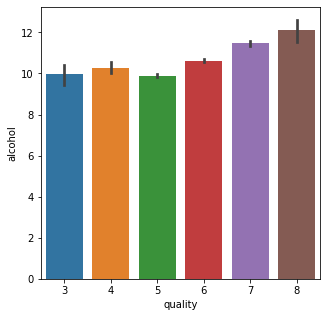

In [ ]:
# alcohol vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = wine_df)

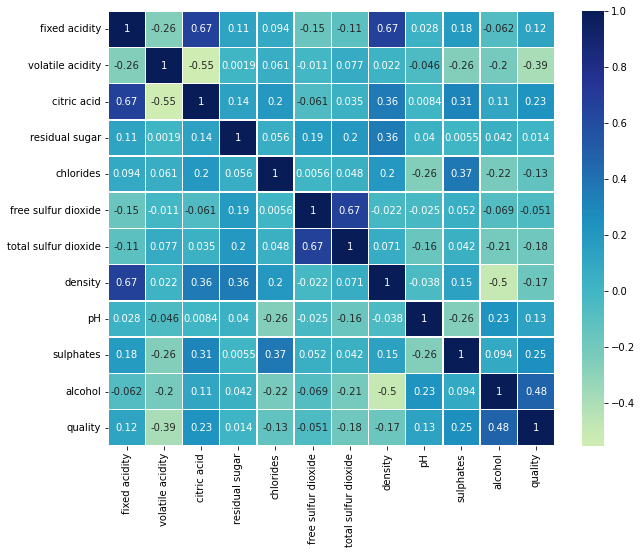

In [ ]:
# Using correlation method to observe the relationship between different variables and stating the insights.

plt.figure(figsize=(10,8))
sns.heatmap(wine_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=True,
            cmap="YlGnBu")
plt.show()

In [ ]:
# Since the numbers 3-9 don't really mean much, lets map these to low(0), mid(1), and high(2)
bins = [0, 5.5, 7.5, 10] # this means 3-5 are low, 6-7 are mid, 8-9 are high
labels = [0, 1, 2]
wine_df['quality'] = pd.cut(wine_df['quality'], bins=bins, labels=labels)

print(wine_df['quality'])


0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [ ]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,0


### Model Building:

In [ ]:
# Split the wine_df into training and test set in the ratio of 80:20 (Training:Test) based on dependent and independent variables.
# splitting data into training and test set for independent attributes.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(wine_df.drop('quality',axis=1), wine_df['quality'], test_size=0.2,
                                                   random_state=22)
X_train.shape,X_test.shape

((1279, 11), (320, 11))

In [ ]:
# # Applying Standard scaling to get optimized result.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# necessary libraries for Model building:  
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
import pickle as pckl

In [ ]:
# Train a RandomForest classifier model on the transformed train and test data. Print the accuracy score.
    
# create a random forest classifier object
# pass the random state to obtain the reproducible results
rfc = RandomForestClassifier(n_estimators=200, criterion="gini", max_depth= 20, random_state=10)

# fit the random forest model on the train data
rfc.fit(X_train, y_train)

# predict the output values for test set
y_pred_rf = rfc.predict(X_test)

# calculate accuracy for test set
test_acc = accuracy_score(y_test, y_pred_rf)
precision_metric = precision_score(y_test, y_pred_rf, average = "macro")
recall_metric = recall_score(y_test, y_pred_rf, average = "macro")
accuracy_metric = accuracy_score(y_test, y_pred_rf)
cmatrix = confusion_matrix(y_test, y_pred_rf)

# return the test accuracy 
print('Test Accuracy:', test_acc)
print('Precision score: {0:0.4f}'.format(precision_metric))
print('Recall score: {0:0.4f}'.format(recall_metric))
print('Accuracy score: {0:0.4f}'.format(accuracy_metric))
print("Confusion Matrix:") 
print(cmatrix)




Test Accuracy: 0.79375
Precision score: 0.5295
Recall score: 0.5315
Accuracy score: 0.7937
Confusion Matrix:
[[116  35   0]
 [ 29 138   0]
 [  0   2   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Train a decision tree classifier model on the transformed train and test data. Print the accuracy score.
# create a decision tree classifier object
# pass the random state to obtain the reproducible results
dtc = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                            max_depth=3, min_samples_leaf=5)

# fit the decision tree classifier model on the train data
dtc.fit(X_train, y_train)

# predict the output values for test set
y_pred_dt = dtc.predict(X_test)

# calculate accuracy for test set
test_acc = accuracy_score(y_test, y_pred_dt)
precision_metric = precision_score(y_test, y_pred_dt, average = "macro")
recall_metric = recall_score(y_test, y_pred_dt, average = "macro")
accuracy_metric = accuracy_score(y_test, y_pred_dt)
cmatrix = confusion_matrix(y_test, y_pred_dt)

# return the test accuracy 
print('Test Accuracy:', test_acc)
print('Precision score: {0:0.4f}'.format(precision_metric))
print('Recall score: {0:0.4f}'.format(recall_metric))
print('Accuracy score: {0:0.4f}'.format(accuracy_metric))
print("Confusion Matrix:") 
print(cmatrix)


Test Accuracy: 0.671875
Precision score: 0.4642
Recall score: 0.4442
Accuracy score: 0.6719
Confusion Matrix:
[[ 71  80   0]
 [ 23 144   0]
 [  0   2   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Train a Adaboost Ensemble Algorithm classifier model on the transformed train and test data. Print the accuracy score.
    
# create a Ada Boost classifier object
# pass the random state to obtain the reproducible results
abcl = AdaBoostClassifier(n_estimators= 300, learning_rate=0.1, random_state=22)

# fit the Adaboost Ensemble Algorithm classifier model on the train data
abcl.fit(X_train, y_train)

# predict the output values for test set
y_pred_ada = abcl.predict(X_test)

# calculate accuracy for test set
test_acc = accuracy_score(y_test, y_pred_ada)
precision_metric = precision_score(y_test, y_pred_ada, average = "macro")
recall_metric = recall_score(y_test, y_pred_ada, average = "macro")
accuracy_metric = accuracy_score(y_test, y_pred_ada)
cmatrix = confusion_matrix(y_test, y_pred_ada)

# return the test accuracy 
print('Test Accuracy:', test_acc)
print('Precision score: {0:0.4f}'.format(precision_metric))
print('Recall score: {0:0.4f}'.format(recall_metric))
print('Accuracy score: {0:0.4f}'.format(accuracy_metric))
print("Confusion Matrix:") 
print(cmatrix)

Test Accuracy: 0.671875
Precision score: 0.4560
Recall score: 0.4482
Accuracy score: 0.6719
Confusion Matrix:
[[ 90  61   0]
 [ 38 125   4]
 [  0   2   0]]


In [ ]:
# import logistic regression and train on tarining set
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear', random_state=0)
logistic_model.fit(X_train, y_train)
# predict the output values for test set
y_pred_Logistic = logistic_model.predict(X_test)

# calculate accuracy for test set
test_acc = accuracy_score(y_test, y_pred_Logistic)
precision_metric = precision_score(y_test, y_pred_Logistic, average = "macro")
recall_metric = recall_score(y_test, y_pred_Logistic, average = "macro")
accuracy_metric = accuracy_score(y_test, y_pred_Logistic)
cmatrix = confusion_matrix(y_test, y_pred_Logistic)

# return the test accuracy 
print('Test Accuracy:', test_acc)
print('Precision score: {0:0.4f}'.format(precision_metric))
print('Recall score: {0:0.4f}'.format(recall_metric))
print('Accuracy score: {0:0.4f}'.format(accuracy_metric))
print("Confusion Matrix:") 
print(cmatrix)

Test Accuracy: 0.703125
Precision score: 0.4684
Recall score: 0.4715
Accuracy score: 0.7031
Confusion Matrix:
[[106  45   0]
 [ 48 119   0]
 [  0   2   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Building a Predictive System

In [ ]:
input_data = (11.2,0.280,3.36,6.1,0.071,17.0,102.0,1.9978,0.0,0.8,11.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# Predicting with Randomforest classifier.
prediction = rfc.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('Bad Quality Wine')
elif (prediction[0]==1):
  print('Medium Quality Wine')
else:
  print('Good/Best Quality Wine')

[0]
Bad Quality Wine
